# 4.2 Exercises: Heat Maps, Spatial Chart, Lollipop Charts

In [23]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
# costco
costco = pd.read_csv('costcos-geocoded.csv')
costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [36]:
# ppg
ppg = pd.read_csv('ppg2008.csv')
ppg.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [37]:
ppg.shape

(50, 21)

In [38]:
px.density_mapbox(costco, lat='Latitude', lon='Longitude',
                        mapbox_style="stamen-terrain", radius=10, title = 'Heatmap of Costco Locations in the US (Heatmap - Python)')

In [28]:
# group by state and then use polyplot
costco_grouped = costco['State'].value_counts().rename_axis('State').reset_index(name='counts')
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
fixed = costco_grouped.replace({"State": us_state_to_abbrev})
fixed

,State,counts
0,CA,115
1,WA,30
2,FL,21
3,AZ,17
4,TX,16
5,IL,16
6,NY,15
7,VA,15
8,OR,13
9,CO,12


In [29]:
costco_grouped['State'] = costco_grouped['State'].str.lower()

fixed2 = costco_grouped.rename(columns={'State': "region", "counts" : "value"})

fixed2.to_csv('costco_grouped2.csv')

In [39]:
fig = px.choropleth(fixed, locations='State',
                    locationmode="USA-states", color='counts', scope="usa", 
                   title="Choropleth Map for Costco Locations in US (Spatial Chart - Python)")
 
fig.show()

In [31]:
# top 25 nba players with freethrow percentage
top_ftp = ppg.sort_values('FTP', ascending=False)[:25]
top_ftp.rename(columns={ top_ftp.columns[0]: "Name" }, inplace = True)
top_ftp

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
41,Ray Allen,79,36.3,18.2,6.3,13.2,0.480,3.0,3.2,0.952,...,6.2,0.409,0.8,2.7,3.5,2.8,0.9,0.2,1.7,2.0
47,Chauncey Billups,79,35.3,17.7,5.2,12.4,0.418,5.3,5.8,0.913,...,5.0,0.408,0.4,2.6,3.0,6.4,1.2,0.2,2.2,2.0
44,Maurice Williams,81,35.0,17.8,6.5,13.9,0.467,2.6,2.8,0.912,...,5.2,0.436,0.6,2.9,3.4,4.1,0.9,0.1,2.2,2.7
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
18,David West,76,39.3,21.0,8.0,17.0,0.472,4.8,5.5,0.884,...,0.3,0.240,2.1,6.4,8.5,2.3,0.6,0.9,2.1,2.7
30,Jason Terry,74,33.6,19.6,7.3,15.8,0.463,2.7,3.0,0.880,...,6.2,0.366,0.5,1.9,2.4,3.4,1.3,0.3,1.6,1.9
38,O.J. Mayo,82,38.0,18.5,6.9,15.6,0.438,3.0,3.4,0.879,...,4.6,0.384,0.7,3.1,3.8,3.2,1.1,0.2,2.8,2.5
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
27,Jamal Crawford,65,38.1,19.7,6.4,15.7,0.410,4.6,5.3,0.872,...,6.1,0.360,0.4,2.6,3.0,4.4,0.9,0.2,2.3,1.4
8,Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,...,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7


In [32]:
top_ftp.to_csv('top_ftp.csv')

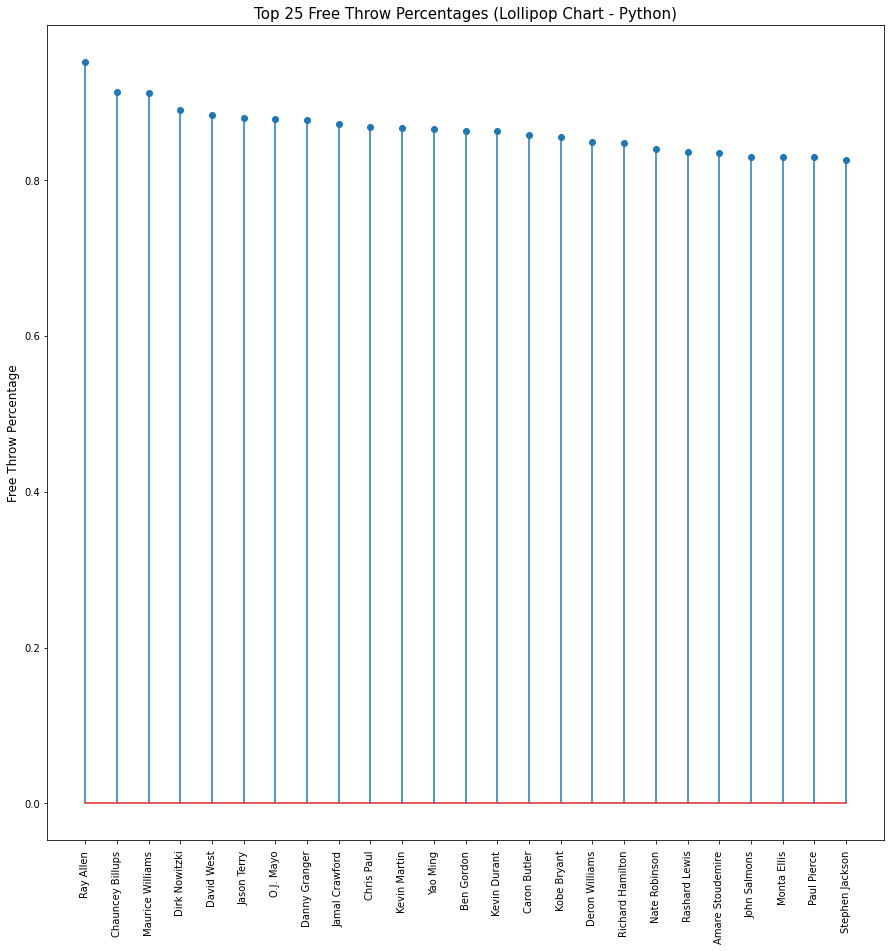

In [33]:
plt.figure(figsize=(15,15))
plt.stem(top_ftp['FTP'])
my_range=range(len(top_ftp.index))
plt.xticks(my_range, labels = top_ftp['Name'], rotation=90)
plt.ylabel('Free Throw Percentage', fontsize=12)
plt.title('Top 25 Free Throw Percentages (Lollipop Chart - Python)', fontsize=15)
plt.show()